In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist 

Using TensorFlow backend.


# Loading the Dataset

In [2]:
(x,y),(x_,y_) = mnist.load_data()
x = x.reshape(-1,784)
x_ = x_.reshape(-1,784)

print (x.shape,y.shape)
print (x_.shape,y_.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784) (60000,)
(10000, 784) (10000,)


3


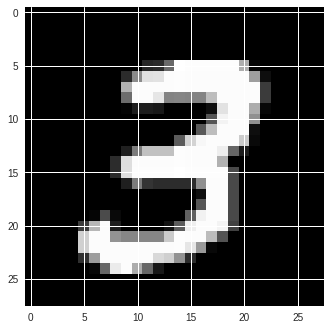

In [3]:
def drawimg(i):
    img = x[i].reshape((28,28))
    print (y[i])
    plt.imshow(img, cmap='gray')
    
drawimg(7)

In [4]:
x_train = x
y_train = y
x_test = x_
y_test = y_
print (x.shape,x_train.shape,x_test.shape)
print (y.shape,y_train.shape,y_test.shape)

(60000, 784) (60000, 784) (10000, 784)
(60000,) (60000,) (10000,)


# Defining the Model

In [0]:
def dist(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())

def knn(x_train,y_train,query_x,k=5):
    # First Step
    dist_vals = []
    
    m = x_train.shape[0]
    for ix in range(m):
        d = dist(query_x,x_train[ix])
        dist_vals.append((d,y_train[ix]))

    dist_vals = sorted(dist_vals)
    dist_vals = dist_vals[:k]
    
    
    y = np.array(dist_vals)
    #print (y)
    t = np.unique(y[:,1],return_counts=True)
    index  = t[1].argmax()
    prediction = t[0][index]
    return prediction
    
def drawquery(x):
    img = x.reshape((28,28))
    plt.imshow(img, cmap='gray')

# Sample Prediction

3
3


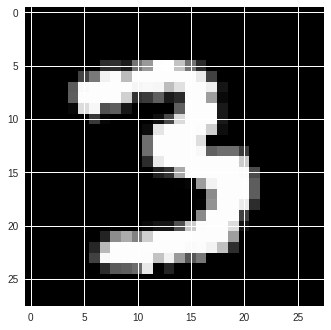

In [6]:
query_x = x_test[500]
pred = int(knn(x_train,y_train,query_x))

print (pred)
print (y_test[500])
drawquery(query_x)

# Splitting the Data

In [7]:
split = int(x.shape[0]*0.80)

x_train = x[:split]
y_train = y[:split]
x_val = x[split:]
y_val = y[split:]
x_test = x_ 
y_test = y_

print (x_train.shape, x_val.shape, x_test.shape)
print (y_train.shape, y_val.shape, y_test.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


# Finding the Accuracy

# Testing Accuracy

In [0]:
def testAccuracy():
    match = 0
    fail = 0
    for i in range(5000):
        pred = int(knn(x,y,x_test[i]))
        if(pred==y_test[i]):
            match += 1
        else:
            fail += 1
        print ("Working for epoch %d. Correct prediction = %d, Failed prediction = %d"%(i,match,fail))
    return match, fail

# Training Accuracy

In [0]:
def trainingAccuracy():
    match = 0
    fail = 0
    for i in range(5000):
        pred = int(knn(x,y,x_train[i]))
        if(pred==y_train[i]):
            match += 1
        else:
            fail += 1
        print ("Working for epoch %d. Correct prediction = %d, Failed prediction = %d"%(i,match,fail))
    return match, fail

# Validation Accuracy

In [0]:
def valAccuracy():
    match = 0
    fail = 0
    for i in range(5000):
        pred = int(knn(x,y,x_val[i]))
        if(pred==y_val[i]):
            match += 1
        else:
            fail += 1
        print ("Working for epoch %d. Correct prediction = %d, Failed prediction = %d"%(i,match,fail))
    return match, fail

In [0]:
matchtest, failtest = testAccuracy()
matchtrain, failtrain = trainingAccuracy()
matchvalidate, failvalidate = valAccuracy()

Working for epoch 0. Correct prediction = 1, Failed prediction = 0
Working for epoch 1. Correct prediction = 1, Failed prediction = 1
Working for epoch 2. Correct prediction = 2, Failed prediction = 1
Working for epoch 3. Correct prediction = 3, Failed prediction = 1
Working for epoch 4. Correct prediction = 3, Failed prediction = 2
Working for epoch 5. Correct prediction = 4, Failed prediction = 2
Working for epoch 6. Correct prediction = 5, Failed prediction = 2
Working for epoch 7. Correct prediction = 5, Failed prediction = 3
Working for epoch 8. Correct prediction = 5, Failed prediction = 4
Working for epoch 9. Correct prediction = 5, Failed prediction = 5
Working for epoch 10. Correct prediction = 5, Failed prediction = 6
Working for epoch 11. Correct prediction = 5, Failed prediction = 7
Working for epoch 12. Correct prediction = 5, Failed prediction = 8
Working for epoch 13. Correct prediction = 5, Failed prediction = 9
Working for epoch 14. Correct prediction = 6, Failed predi

In [25]:
print ("For Training Data")
print ("     Accuracy = "+str(matchtrain/5000) )
print ("For Testing Data")
print ("     Accuracy = "+str(matchtest/5000) )
print ("For Validation Data")
print ("     Accuracy = "+str(matchvalidate/5000) )


For Training Data
     Accuracy = 0.5
For Testing Data
     Accuracy = 0.35
For Validation Data
     Accuracy = 0.35
